<a href="https://colab.research.google.com/github/tolani007/Fun-Data-Science-Content-from-Tiki/blob/main/%5BDS%5D_L5_Brainstation_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div id="container" style="position:relative;">
<div style="float:left"><h1> Statistics </h1></div>
<div style="position:relative; float:right">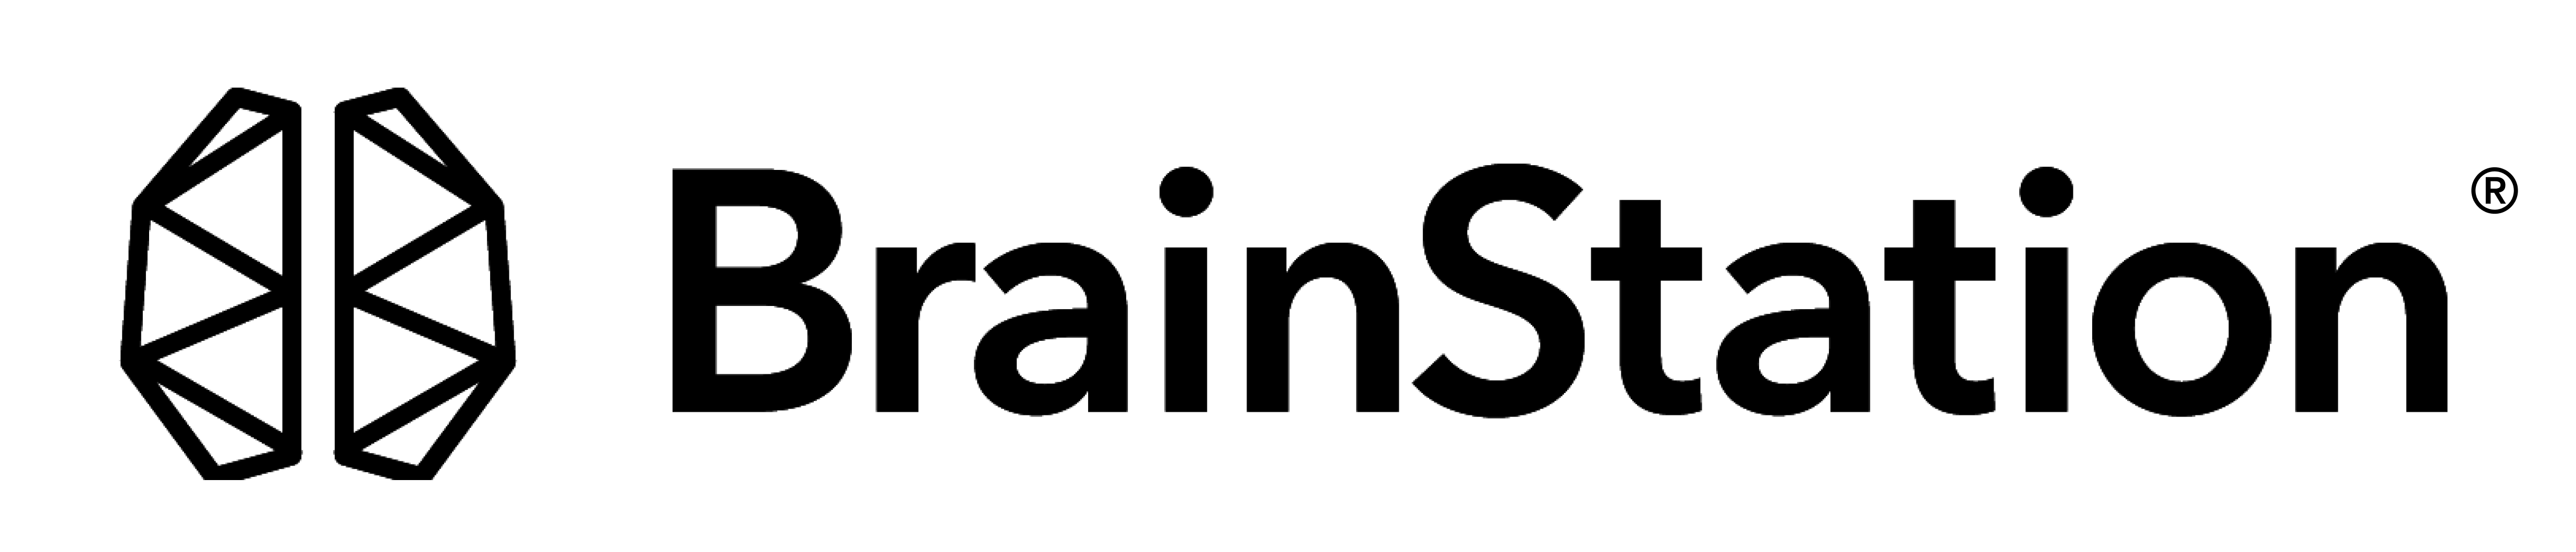
</div>
</div>


# Learning Outcomes

- Learn the fundamentals of applying single-variable descriptive statistics.
- Understand the principles of hypothesis testing, including the distinction between null and alternative hypotheses.
- Gain a comprehensive understanding of various hypothesis tests, and their
applications.
- Learn how to design, execute, and interpret the results of A/B tests.

Table of Contents
=================

1. [Lesson Introduction](#Lesson-Introduction)
2. [Statistical Analysis](#Statistical-Analysis)
   - [Single Variable Descriptive Statistics](#Single-Variable-Descriptive-Statistics)
   - [Covariance](#Covariance)
     - [The Covariance Matrix](#The-Covariance-Matrix)
   - [Correlation](#Correlation)
3. [Hypothesis Testing](#Hypothesis-Testing)
   - [Significance Level and p Value](#Significance-Level-and-p-Value)
   - [Types of Tests](#Types-of-Tests)
   - [Test Statistics](#Test-Statistics)
   - [Test Results](#Test-Results)
4. [A/B Testing](#A/B-Testing)
   - [A/B Testing Example](#A/B-Testing-Example)
5. [Type I/II Errors](#Type-I/II-Errors)
6. [Key Takeaways](#Key-Takeaways)
7. [Next Up](#Next-Up)
8. [Assignment 5](#Assignment-5)

# Your Experience Matters
We require every learner to participate in a
Course Experience Survey twice during their course so we can ensure you are meeting your learning goals and having the best possible experience.

Please take 10 minutes to rate how you've enjoyed the Course so far by going to **Synapse → Experience Survey**.

# Lesson Introduction

In the previous lesson, we focused on cleaning datasets to prepare them for advanced analysis. The cleaning process helped us to remove noise from the data which could skew our insights and give us incorrect relationships.

As a crucial next step in the data analysis process, summarizing descriptive statistics will provide a high-level understanding of the various columns and variables. Combined with hypothesis testing, this can enhance data interpretation and reveal key relationships that can be used for modeling later.


# Statistical Analysis

In this lesson, we are going to dive into statistical analysis within the lifecycle of a data science project. Understanding statistical features of a dataset can help in better interpreting the data pattern and trend. It can show some preliminary features of the data, such as its distribution or the presence of outliers.

Another important use of statistical analysis is hypothesis testing. Hypothesis testing is a step-by-step process to determine whether a stated hypothesis about a given population is true. In many scenarios, accessing the data of an entire population is impossible, so data scientists use a sample dataset to make inferences about the population.

In these scenarios, statistical analysis helps us confidently make predictions about the population. A common use case for hypothesis testing in the industry is A/B testing. In A/B testing, companies compare two versions of a website or mobile application to determine whether adding a new feature will impact usage metrics. We will investigate A/B testing thoroughly in this lecture.

Let's now start by talking about some basic statistical information.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


import warnings

warnings.filterwarnings(action='ignore')

### Single Variable Descriptive Statistics

**Central Tendency**

*  **Mean**:  this is the term for what we generally call an "average".  We add all of the numbers in our data set, and then divide by the size of the set.  Symbolically, if $A = \{a_1,a_2,\ldots,a_n\}$ is our data set, then the arithmetic mean (denoted $\bar{A}$) is computed as:
$$ \begin{align}
\bar{A} &=  \frac{1}{n}(a_1+a_2+\ldots+a_n) \\
&= \frac{1}{n}\sum_{i=1}^na_i
\end{align}$$
* **Median**: for a given data set (of numbers), the median is the number that separates the top half of the data from the bottom half.  If the size of the data set is even (there is no single data point in the middle), the median is given by the mean of the two middle values, after arranging the data into ascending order.
* **Mode**: the mode is the value that occurs most frequently in a data set.

**Dispersion**

* **Variance**: The _variance_ of a dataset is the average of the squared differences between each data point and the mean.
$$
\begin{align}
\text{Var}(X) &= \frac{1}{n}\left((x_1-\bar{X})^2+(x_2-\bar{X})^2+\ldots+(x_n-\bar{X})^2\right) \\
&= \frac{1}{n}\sum_{i=1}^n (x_i-\bar{X})^2
\end{align}$$  



* **Standard Deviation**: the standard deviation is the square root of the variance.  One useful property of the standard deviation is that it is in the same units as the original data set (unlike the variance).  A low standard deviation implies the data is clustered near the mean, whereas a high standard deviation implies the data has a tendency to be further from the mean.

We can use built-in NumPy functions to calculate statistics for the series objects we have.

In [ ]:
# Defining a series and calculating its statistical features

s = pd.Series([1, 2, 3, 4, 5])
print(s.mean())
print(s.median())
print(s.std())
print(s.var())

3.0
3.0
1.5811388300841898
2.5


Let's practice using the Anscombe's quartet dataset. This dataset can be found in Synapse under today's lesson.

In [ ]:
anscombe = pd.read_csv('data/anscombe.csv')

In [ ]:
anscombe.head()

,X,Y,Dataset
0,10,8.04,I
1,8,6.95,I
2,13,7.58,I
3,9,8.81,I
4,11,8.33,I


Recall that Anscombe's quartet is four datasets with very similar descriptive statistics. We'll plot the four below.

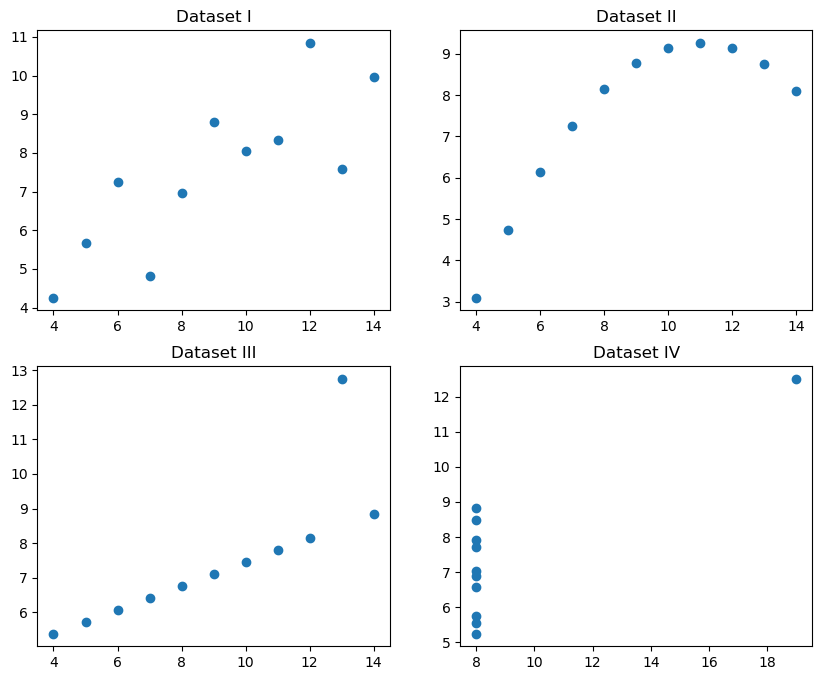

In [ ]:
# Set up a subplot grid

plt.subplots(2,2, figsize=(10,8))

# Iterate over the datasets and their indices

for i, dataset in enumerate(['I','II','III','IV']):

    # Plot each dataset
    plt.subplot(2,2,i+1)
    plt.scatter(
        anscombe[anscombe['Dataset'] == dataset]['X'],
        anscombe[anscombe['Dataset'] == dataset]['Y']
    )
    plt.title(f'Dataset {dataset}')

plt.show()

Let's verify which descriptive statistics are equal across each of these datasets. In order to do so, we will aggregate the data using the `Dataset` column.

In [ ]:
anscombe.groupby('Dataset').agg(['mean', 'median', 'std', 'var'])

X                                Y                           
        mean median       std   var      mean median       std       var
Dataset                                                                 
I        9.0    9.0  3.316625  11.0  7.500909   7.58  2.031568  4.127269
II       9.0    9.0  3.316625  11.0  7.500909   8.14  2.031657  4.127629
III      9.0    9.0  3.316625  11.0  7.500000   7.11  2.030424  4.122620
IV       9.0    8.0  3.316625  11.0  7.500909   7.04  2.030579  4.123249

All descriptive statistics appear consistent across all datasets, despite significant visual differences in the plots. This highlights the importance of caution when relying solely on descriptive statistics.

### Covariance

The descriptive statistics that we've studied so far give us ways to summarize aspects of a single column of data. _Covariance_ and _correlation_ are ways to summarize how two columns of data interact with each other. Given two equal-length lists of numbers $X=(x_1, x_2, ..., x_N)$ and $Y=(y_1, y_2, ..., y_N)$, the covariance of $X$ and $Y$ is given by the following formula.

$$
\begin{align}
\text{Cov}(X,Y) &= \frac{1}{N}\left( (x_1 - \bar{X})(y_1 - \bar{Y}) + (x_2 - \bar{X})(y_2 - \bar{Y}) + ... + (x_N - \bar{X})(y_N - \bar{Y}) \right) \\
&= \frac{1}{N}\sum_{i=1}^N (x_i - \bar{X})(y_i - \bar{Y})
\end{align}$$

*Questions to think about:*
- The covariance formula is an average. Each term in the covariance formula is a product $(x_k - \bar{X})(y_k - \bar{Y})$. How can that product be negative? How can it be positive? How can it be zero?
- How can the whole average be positive, negative, or zero?

Generally, when two columns have a high (positive) covariance, it means that they move together in some sense -- when one is large (above average), the other is large, and vice versa.

---
### Exercise 1

1. Complete the below function that uses only the built-in functions `sum` and `len`and takes two equal-length lists of numbers and outputs the covariance of the two lists.

```
def covariance(x, y):
    assert len(x) == len(y)  # This is a useful trick for on-the-fly bug swatting

    # write your function here

    pass

```

---

In [ ]:
# Write your code here

#### The Covariance Matrix
The covariance is defined pairwise -- that is, there is only a covariance between _pairs_ of variables. To look at covariances within an entire dataset, we can use something called the _covariance matrix_. For a dataset with $n$ columns, the covariance matrix of that dataset is an $n\times n$ matrix where the $ij$-th entry is the covariance of the $i$-th and $j$-th columns. Pandas gives you a covariance matrix of a dataframe using the `df.cov()` function.

In [ ]:
anscombe.loc[anscombe['Dataset'] == 'I', ['X', 'Y']].cov()

,X,Y
X,11.000,5.501000
Y,5.501,4.127269


**Considering the covariance formula, what's along the diagonals?**

Let's now check the covariance of X and Y for each dataset in Anscombe's quartet.

In [ ]:
# Covariance matrix for each Dataset in Anscombe's quartet

anscombe.groupby("Dataset").agg("cov")

X         Y
Dataset                    
I       X  11.000  5.501000
        Y   5.501  4.127269
II      X  11.000  5.500000
        Y   5.500  4.127629
III     X  11.000  5.497000
        Y   5.497  4.122620
IV      X  11.000  5.499000
        Y   5.499  4.123249

### Correlation

When $X$ and $Y$ move together, then $\text{Cov}(X,Y) \gg 0$, and when they move in opposite directions, then $\text{Cov}(X,Y) \ll 0$.

But there's still a problem: how big is big? Covariance is very sensitive to units. If $X$ is measured in inches, $Y$ is measured in feet, and $Z$ is just $X$ in feet, then we would have $\text{Cov}(Z,Y) = 12\text{Cov}(X,Y)$, even though $Z$ and $X$ are measuring the same thing. So there's no way to know in a vacuum when the covariance is large. One solution to this is to use a normalized version of the covariance. This is known as the Correlation, and it is computed as

$$\text{Cor}(X,Y) = \frac{\text{Cov(X,Y)}}{\text{SD}(X)\text{SD}(Y)}$$

This number is called Pearson's correlation coefficient, and is sometimes denoted by the Greek letter $\rho$, in which case we write the correlation between datasets $X$ and $Y$ as $\rho_{XY}$.

The number $\rho_{XY}$ is always between 1 and -1. A correlation of 1 corresponds to a perfect linear relationship with a positive slope, and a correlation of -1 corresponds to a perfect linear relationship with a negative slope.


We can define the _Correlation Matrix_ analogously to the covariance matrix. This is helpfully built for us in Pandas, and is useful to look at. Let's use it with the diamonds dataset.

In [ ]:
diamonds = pd.read_csv('data/diamonds.csv')

diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.70,Premium,J,VS2,61.2,60.0,1940,5.73,5.70,3.50
1,1.02,Good,I,SI1,64.2,53.0,3998,6.30,6.26,4.03
2,1.07,Ideal,H,SI1,62.0,57.0,4918,6.56,6.51,4.05
3,1.20,Very Good,G,SI2,62.6,60.0,5116,6.68,6.74,4.20
4,0.34,Very Good,E,SI1,60.3,57.0,596,4.53,4.56,2.74


We can now calculate the correlation between numerical columns.

In [ ]:
diamonds.corr(numeric_only=True)

,carat,depth,table,price,x,y,z
carat,1.000000,0.024126,0.170527,0.923075,0.975987,0.889799,0.973268
depth,0.024126,1.000000,-0.292511,-0.011173,-0.028646,-0.036580,0.092915
table,0.170527,-0.292511,1.000000,0.118126,0.183609,0.159047,0.142370
price,0.923075,-0.011173,0.118126,1.000000,0.886250,0.809325,0.880184
x,0.975987,-0.028646,0.183609,0.886250,1.000000,0.909454,0.988819
y,0.889799,-0.036580,0.159047,0.809325,0.909454,1.000000,0.918352
z,0.973268,0.092915,0.142370,0.880184,0.988819,0.918352,1.000000


That's a lot of numbers to look at. Seaborn has a useful way to visualize this.

In [ ]:
import seaborn as sns

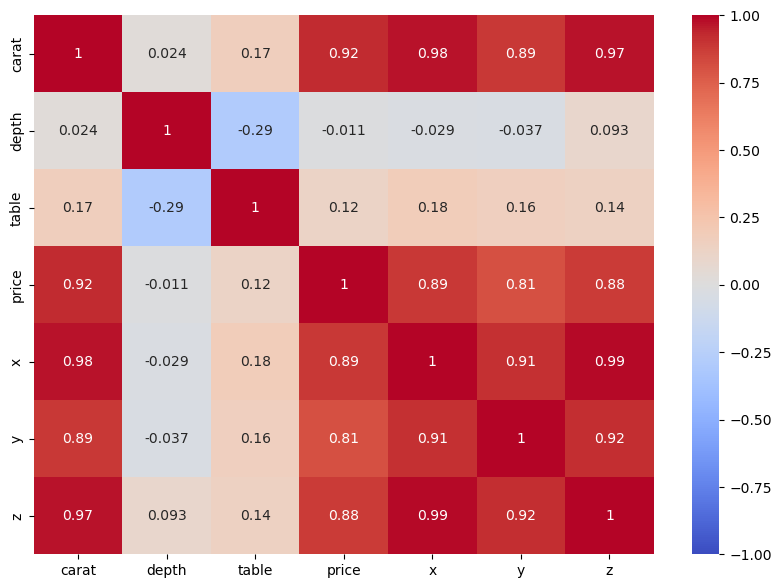

In [ ]:
# Visualizing the corr matrix

corr_matrix = diamonds.corr(numeric_only=True)

plt.figure(figsize=(10,7))

sns.heatmap(corr_matrix, vmin = -1, vmax = 1, annot = True, cmap='coolwarm')

plt.show()

We notice that the diagonal entries are all 1, because each column is maximally correlated with itself.  The correlation between `A` and `B` is ~0.857, which is relatively close to 1.  This means the values in the columns tend to move together (i.e. there is a strong linear relationship between `A` and `B`).

To summarize, correlation is a normalized measure of linear dependence between two variables. It is important to note that having correlation 0 does not rule out non-linear patterns between the variables and even in case of a linear relationship, the correlation is not the slope.

---

### Exercise 2

1. Load in the timeseries_1.csv price dataset and compute the correlation between the different price columns to analyze the results.

---

In [ ]:
# Write your code here

## Hypothesis Testing

Now that we have an understanding of how to describe our data using descriptive statistics, we can use this information as a foundation for making inferences about the population from which our dataset was drawn. We can use hypothesis testing as a way to determine whether the patterns we observe in our descriptive statistics are truly representative of the larger population, or if they are due to chance.

Hypothesis testing is a fundamental part of _frequentist_ statistics. The frequentist hypothesis testing framework is one of the most common methods for analyzing data in the natural and social sciences, economics, and applied work such as A/B testing.

Hypothesis testing involves determining whether your data provides _statistically significant_ evidence for or against a particular theory or hypothesis. Let's consider an example.

Suppose you flip a coin five times, and it lands heads each time. We'll use hypothesis testing to determine whether this outcome provides statistically significant evidence that the coin is biased. To investigate this hypothesis, we start by defining our null and alternative hypotheses:

1. **Null Hypothesis (H_0)**: The null hypothesis, often denoted by \(H_0\), should represent the opposite of what you suspect or are trying to prove. It is "null" because it generally corresponds with the idea of "no effect" or that there is "nothing" unusual.

2. **Alternative Hypothesis (H_1)**: The alternative hypothesis, often denoted by \(H_1\), is the statement you aim to support with the experimental data. This hypothesis arises from the observed data, and data scientists use hypothesis testing to demonstrate that this data has not been generated by chance and is representative of the overall population.

---

### Exercise 3

1. What is the **null** and **alternative** hypothesis for the coin experiment?
2. If we assume that the null hypothesis is true, what would be the probability of observing our dataset?

---

In [ ]:
# Write your code here

### Significance Level and p Value

The second step in hypothesis testing involves setting the significance level parameter. Before discussing the significance level, we should understand the **p-value**.

The p-value is a fundamental parameter in hypothesis testing. It is a probability measure that helps determine the significance of the results. The p-value is defined as the probability of observing a test statistic at least as extreme as the one derived from the sample data, assuming that the null hypothesis, \(H_0\), is true.

Another way to describe the p-value is as the probability of incorrectly rejecting \(H_0\) when it is actually true. Here’s how we interpret the p-value:

- If the p-value is large, then the result we observe would be relatively common if the null hypothesis were true. In that case, we conclude that this data does not provide significant evidence against the null hypothesis, so the test is inconclusive.

- Conversely, if the p-value is very small, then our result would be very unlikely if the null hypothesis were true. In this case, the test is conclusive, and we **reject the null hypothesis**: we have statistically significant evidence against the null hypothesis.

The threshold we use to determine whether a p-value is large or small is called the significance level. We specify a significance level below which we will reject the null hypothesis, often denoted by ($\alpha$), with a typical value of ($\alpha$). Thus, when we see p-values below 0.05, we usually declare that we have statistically significant results. The significance level denotes the maximum allowable probability for making a **false positive** error in our test.

Significance levels for p-values are often chosen by convention but are arbitrary. Often, the choice of p < 0.05 is used. There is controversy and misunderstanding surrounding p-values. Ronald Wasserstein & Nicole Lazar note in their paper "The ASA's Statement on p-Values: Context, Process, and Purpose":

> Researchers should bring many contextual factors into play to derive scientific inferences, including the design of a study, the quality of the measurements, the external evidence for the phenomenon under study, and the validity of assumptions that underlie the data analysis. Pragmatic considerations often require binary, “yes-no” decisions, but this does not mean that p-values alone can ensure that a decision is correct or incorrect. The widespread use of “statistical significance” (generally interpreted as “p ≤ 0.05”) as a license for making a claim of a scientific finding (or implied truth) leads to considerable distortion of the scientific process.

Further reading can be found here:

- [P Values are not Error Probabilities by R. Hubbard et al.](https://www.uv.es/sestio/TechRep/tr14-03.pdf)
- [Misuse of p-values from Wikipedia](https://en.wikipedia.org/wiki/Misunderstandings_of_p-values)
- [The ASA Statement on p-Values: Context, Process, and Purpose by Wasserstein et al.](http://amstat.tandfonline.com/doi/full/10.1080/00031305.2016.1154108)

---

### Exercise 4

1. At a significance level of $\alpha=0.05$, do we reject or fail to reject the null hypothesis for our coin flips? Are 5 flips enough to be statistically significant?


---

In [ ]:
# Write your code here

### Types of Tests

The next step in hypothesis testing is to choose the type of test. Various tests exist, and the appropriate one should be selected based on the hypothesis and the characteristics of the dataset. Here's an overview of several common types of hypothesis tests in statistics, including their typical applications:

1. **t-Test**: A t-test is used to compare the means of two groups or to compare a single group's mean against a known standard. This test is suitable for small sample sizes (generally less than 30) and when the data is normally distributed but the population standard deviation is unknown. For larger sample sizes, a similar test called the z-test can be used. The t-test is typically divided into two categories based on the null hypothesis:
   - **One-sample t-test**: Used when comparing a sample mean to a known population mean or specific value.
   - **Two-sample t-test**: Used when comparing the means of two different datasets.

2. **Chi-Square Test**: The Chi-Square test evaluates whether observed frequencies in categorical data match expected frequencies under the null hypothesis. It is used in two major scenarios:
   - **Goodness-of-fit test**: To determine if the data fits a specific distribution.
   - **Test of independence**: To explore relationships between categorical variables.

3. **Proportion Z-Test**: This test compares the proportion of a characteristic within a sample to a known proportion or compares proportions between two samples. It is applicable when the sample size is large enough for the Central Limit Theorem to assume that the sampling distribution of the proportion is approximately normal.

4. **ANOVA (Analysis of Variance)**: ANOVA tests whether there are statistically significant differences between the means of three or more independent (unrelated) groups. This test is particularly useful when comparing multiple groups to determine if at least one group mean significantly differs from the others.

5. **F-Test**: The F-test is used to compare the variances of two populations. It is commonly employed to test the equality of variances, which is a crucial assumption in conducting an ANOVA. It is useful when the variances of the populations are unknown.

### Test Statistics

Once the appropriate test has been selected, the next step is to calculate the **test statistic**. Each test defines a specific test statistic: a single value that summarizes key aspects of the dataset, such as the mean, correlation coefficient, or other complex metrics. This statistic, derived from the observed data, is crucial for evaluating the likelihood of the null hypothesis being true.

##### Sampling Distribution

For any chosen test statistic, the **sampling distribution** is crucial. This distribution represents the range of values that the test statistic could theoretically assume if we repeatedly calculated it from multiple samples of the same size drawn from the same population.

Understanding the sampling distribution of our test statistic is essential for computing the p-value. The p-value is the proportion of values from the sampling distribution that are as extreme as, or more extreme than, our observed statistic, under the assumption that the null hypothesis is true.

One of the pivotal concepts in hypothesis testing involving sampling distributions is the Central Limit Theorem (CLT). This theorem states that the sampling distribution of the mean of any population, irrespective of its underlying distribution, will approximate a normal distribution as the sample size becomes sufficiently large. The CLT is commonly utilized in hypothesis testing to justify the assumption of a normal distribution for the sampling distribution, thereby facilitating the calculation of the p-value. This assumption is critical for the accuracy and reliability of statistical inferences in hypothesis testing.

CLT is shown in the following visualization. Here, you can think of the population of heights as the first row of plots. If we simulate samples from those populations (blue points in the second row of plots) and overlay the means of each of those samples (dark orange line), you can clearly see the sampling variability of the mean—the amount the dark orange zigs and zags from sample to sample. Then, in the final row of the image, we plot the sampling distribution—essentially a histogram of all of those means we calculated in the second row of plots. The CLT argues that the final row of plots will always approach a normal shape even if the population (first row of plots) is not normally distributed. Read more about CLT [here](https://en.wikipedia.org/wiki/Central_limit_theorem)

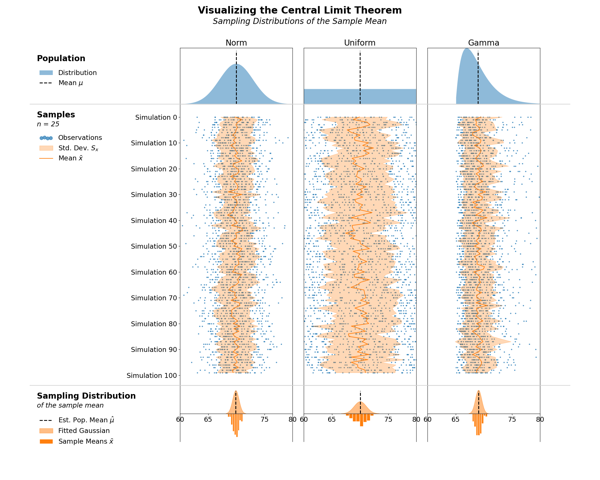

### Test Results

As the final step in hypothesis testing, once we have calculated the test statistic, we proceed to reference the sampling distribution to find the corresponding p-value. This p-value represents the area under the distribution at the test statistic. We then compare this p-value to our significance level. If the p-value is below the significance level, we reject the null hypothesis and accept the alternative hypothesis. If it is not, we conclude that there is not enough evidence to reject the null hypothesis, and the test is considered **inconclusive**.

## A/B Testing

A/B testing is a type of hypothesis testing which is used at its most basic to compare two versions of something to figure out which performs better. While it’s most often associated with websites and apps, it is almost 100 years old.

A/B tests are a modern business take on the idea of a [Randomized Controlled Trial](https://en.wikipedia.org/wiki/Randomized_experiment). RCTs are experiments where participants are randomly assigned to either a `Control` or a `Treatment`. For instance, in clinical trials, the Control is usually some kind of placebo pill, whereas the Treatment is the real drug. A/B testing is used widely in UX/UI design to measure the impact of design tweaks.

The beauty of an A/B test is that it allows us to jump from the observation that things are _correlated_ with the treatment variable to the conclusion that the treatment is **causing** an effect. This is very powerful, and something that we can't always do without the benefit of randomization.

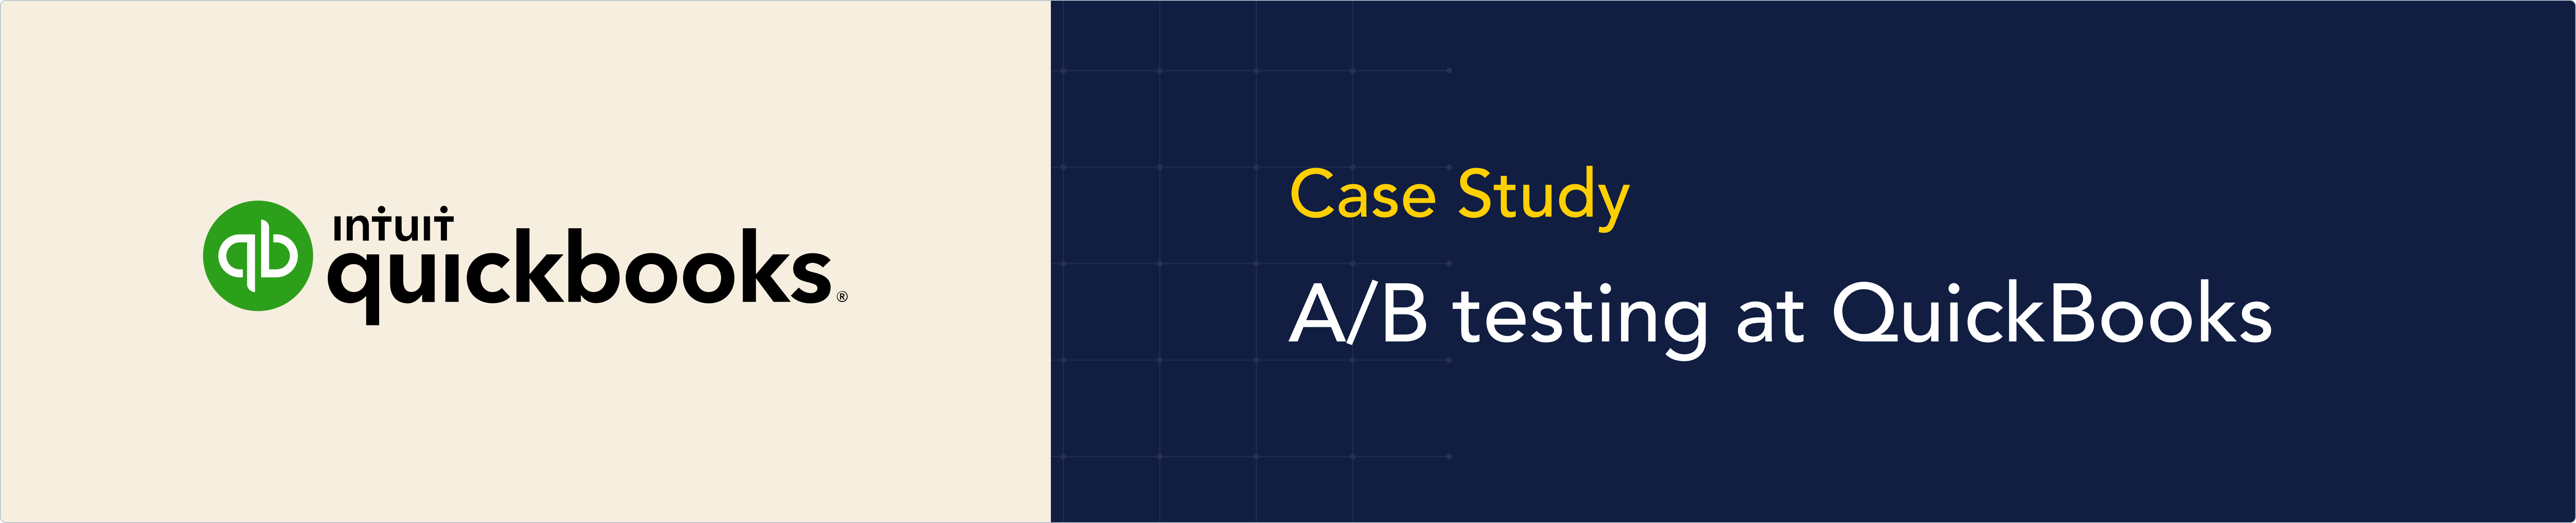
</div>
</div>


We will explore the steps of an A/B testing by examining a case study at QuickBooks. In a published case study, QuickBooks shares an experiment that showcases the importance of A/B testing in improving user experience and driving business growth. To learn more about this experiment, you can read the detailed analysis on their Engineering Blog [here](https://quickbooks-engineering.intuit.com/experimentation-intuit-par[here](https://quickbooks-enginering.intuit.com/experimentation-intuit-part-4-analysis-of-experiments-1a17a3762107).

QuickBooks runs thousands of concurrent experiments involving millions of users to analyze various business metrics such as acquisition, engagement, and retention. One of the experiments they perform is the hypothesis that displaying all products in one place increases user-perceived value and thus the subscription rate. To evaluate this hypothesis, they have conducted an A/B test with the following steps:

**1. State the Hypothesis**

- H0: Displaying all products together has no impact on perceived value.
- H1: Displaying all products together increases perceived value.

**2. Set the Parameters**

QuickBooks sets the level of statistical significance, typically at 5%, to determine the threshold for accepting or rejecting the null hypothesis.

**3. Compute the Data Size**

Sample size is critical and is determined based on the required statistical significance. Sample size depends on various factors such as the significance level ($\alpha$) and the [power of the test](https://en.wikipedia.org/wiki/Power_(statistics)). There are online calculators to help calculate the sample size. [Here](https://www.evanmiller.org/ab-testing/sample-size.html) is an example.

**4. Collect the Data**

After determining the sample size, the control (current layout) and the test group (new layout) are randomly selected from the user pool to ensure representativeness and unbiased comparison. Then, they calculate the test statistic and the p-value to determine if the observed difference is statistically significant. In this scenario, t-test is performed as the mean of two groups are compared.

**5. Analyze the Results**

After gathering and analyzing the data, QuickBooks compares the results to the set threshold. If the p-value is less than 5%, the null hypothesis is rejected, indicating that the new product placement improves perceived value and subscription rates.

### A/B Testing Example

To better understand how A/B testing can be performed, we will follow the steps mentioned above and go through a Google Ads dataset in which Google has performed an experiment to evaluate the impact of a new UI change on the click-through rate. (CTR) and Conversion Rate (CR).
Let's start by loading the datasets.

In [ ]:
control_group = pd.read_csv('data/control.csv', index_col=0)
test_group = pd.read_csv('data/test.csv', index_col=0)

In [ ]:
control_group.head()

,Campaign Name,# of Impressions,# of Website Clicks,# of Purchase
0,Control Campaign,82702.0,7016.0,618.0
1,Control Campaign,121040.0,8110.0,511.0
2,Control Campaign,131711.0,6508.0,372.0
3,Control Campaign,72878.0,3065.0,340.0
4,Control Campaign,NaN,NaN,NaN


In [ ]:
test_group.head()

,Campaign Name,# of Impressions,# of Website Clicks,# of Purchase
0,Test Campaign,39550,3038,255
1,Test Campaign,100719,4657,677
2,Test Campaign,70263,7885,578
3,Test Campaign,78451,4216,340
4,Test Campaign,114295,5863,768


Let's perform a quick sanity check.

In [ ]:
# Missing values

test_group.isna().sum()

Campaign Name          0
# of Impressions       0
# of Website Clicks    0
# of Purchase          0
dtype: int64

In [ ]:
# duplicate values

test_group.duplicated().sum()

0

In [ ]:
# Missing values

control_group.isna().sum()

Campaign Name          0
# of Impressions       1
# of Website Clicks    1
# of Purchase          1
dtype: int64

We see that there are some missing values in the data. We can simply fill them with the median.

In [ ]:
# Filling missing values with median

control_group.iloc[:,1:] = control_group.iloc[:,1:].fillna(control_group.iloc[:,1:].median())

In [ ]:
control_group.isna().sum()

Campaign Name          0
# of Impressions       0
# of Website Clicks    0
# of Purchase          0
dtype: int64

In [ ]:
# duplicate values

control_group.duplicated().sum()

0

Now that the data is more or less clean, we can combine these two datasets and create one before we go any further in our analysis.

In [ ]:
df_test = pd.concat([control_group, test_group], axis=0)

df_test.head()

,Campaign Name,# of Impressions,# of Website Clicks,# of Purchase
0,Control Campaign,82702.0,7016.0,618.0
1,Control Campaign,121040.0,8110.0,511.0
2,Control Campaign,131711.0,6508.0,372.0
3,Control Campaign,72878.0,3065.0,340.0
4,Control Campaign,113430.0,5224.0,501.0


### KPIs for the Test

We want to perform A/B testing on two metrics, namely CTR and CR to determine if there is any significant difference between these two groups. As the first step, we need to calculate these metrics.

```
CTR = Average Clicks / Average Impressions

CR = Average Purchases / Average Impressions

```

Before we can calculate the test statistic and p-value, we need to calculate the average *CTR* and *CR* for each group. To do so, we can aggregate the data.

In [ ]:
# Control group

df_test['CTR'] = (df_test['# of Website Clicks'] / df_test['# of Impressions'])
df_test['CR'] = (df_test['# of Purchase'] / df_test['# of Impressions'])

In [ ]:
# Get the average of the metrics

avg_df = df_test.groupby(by='Campaign Name')[['CTR','CR']].mean()

In [ ]:
avg_df

,CTR,CR
Campaign Name,,
Control Campaign,0.050795,0.004981
Test Campaign,0.102423,0.008425


We can see that the CTR in the test group has increased which indicates better engagement with the ad. We can see that the CR has increased as well, suggesting that the test ad gets more clicks and it converts those clicks to purchases at a higher rate.

We can visualize the distributions of the metrics as well!

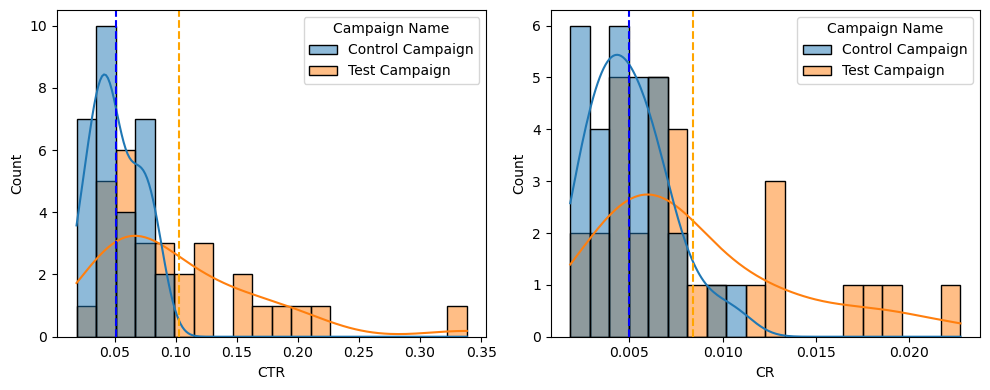

In [ ]:
plt.subplots(1,2, figsize = (10,4))


plt.subplot(1,2,1)
sns.histplot(data = df_test, x='CTR', hue='Campaign Name', bins=20, kde=True)
plt.axvline(avg_df.loc['Control Campaign', 'CTR'], ls = '--', color = 'blue')
plt.axvline(avg_df.loc['Test Campaign', 'CTR'], ls = '--', color = 'orange')

plt.subplot(1,2,2)
sns.histplot(data= df_test, x='CR', hue='Campaign Name', bins=20, kde=True)
plt.axvline(avg_df.loc['Control Campaign', 'CR'], ls = '--', color = 'blue')
plt.axvline(avg_df.loc['Test Campaign', 'CR'], ls = '--', color = 'orange')

plt.tight_layout()



plt.show()

### Hypothesis Testing

1. In the first step, we need to define the null and alternative hypothesis.

- **Null Hypothesis H₀**: There is no significant difference in means between Control and Test Campaigns.

- **Alternative Hypothesis H₁**: There is significant difference in means between Control and Test Campaigns.

2. In the second step, we have to set our parameters, namely our statistical significance.

Let's set alpha = 5%

Since the sample size is 30, we can make the assumption that the sampling distribution is normal and therefore we can use the t-test for our analysis. Since these are two different datasets collected from different users, we will use a two sample t-test.

To run the test and calculate the p-value, we will use the scipy library.

In [ ]:
from scipy import stats

In [ ]:
# CTR

control_ctr = df_test.loc[df_test['Campaign Name']=='Control Campaign', 'CTR']
test_ctr = df_test.loc[df_test['Campaign Name']=='Test Campaign', 'CTR']

In [ ]:
# Two sample independent test for CTR

stats.ttest_ind(control_ctr, test_ctr)

TtestResult(statistic=-4.002493097717084, pvalue=0.0001802258266051824, df=58.0)

In [ ]:
# CTR

control_cr = df_test.loc[df_test['Campaign Name']=='Control Campaign', 'CR'].dropna()
test_cr = df_test.loc[df_test['Campaign Name']=='Test Campaign', 'CR'].dropna()

In [ ]:
# Two sample independent test for CR

stats.ttest_ind(control_cr, test_cr)

TtestResult(statistic=-3.347137123403205, pvalue=0.0014379151514162113, df=58.0)

**Click-Through Rate (CTR)**

The p-value is less than 0.05, indicating a significant difference in CTR between the Control and Test campaigns.
This supports the earlier observation that the Test Campaign has a higher CTR, making the Test Campaign significantly more engaging.

**Conversion Rate (CR)**

The p-value is less than 0.05, indicating a significant difference in CR between the Control and Test campaigns confirming our observation that the increased CTR is associated with higher CR.

---

#### Exercise 5

1. The data in abtest.csv gives the results of an A/B test. 300 participants were randomly selected into either a Control group or a Treatment group. The Control group was shown an existing landing page, and the Treatment group was shown a redesigned version. The intent of the experiment is to determine whether the redesign encouraged people to view the page for longer. Run a hypothesis test and determine whether there was a change in the view time and it was significant. The time spent on the page is given.


2. Chi2 test is an important type of hypothesis testing, which is typically used to test if two categorical features are related or not. This test requires the distribution frequency of one category with respect to the other one, called a contingency table. We can use `stats.chi2_contingency` function to run this test.
We would like to run this test to evaluate there is any relationship between the browser selection and group type in the `abtest` dataset. Create the frequency table for browser selections with respect to the group using `pd.crosstab()` function. Save the table in a new variable and pass it to the `stats.chi2_contingency` function and evaluate the p-value.

---

In [ ]:
abtest = pd.read_csv('data/abtest.csv')
abtest.head()

,group,time_on_page,browser,click
0,Control,1.748084,Safari,False
1,Treatment,5.947352,Firefox,True
2,Control,2.007091,Chrome,False
3,Treatment,1.633244,Safari,True
4,Control,0.560507,Chrome,True


In [ ]:
# Write your code here

### Type I/II Errors

We've set up our null hypothesis, chosen our test, selected the p-value threshold, run the test, and decided whether or not to reject the null hypothesis. It's quite possible that our choice was correct, but it's also possible that it was not.  We can categorize incorrect choices into the following error types:

1. **Type I Error**: the null hypothesis was true, but we rejected it. (False positive.)
2. **Type II Error**: the null hypothesis was false, but we did not reject it. (False negative.)

Type I errors are risky, we bank on the existence of something that wasn't there; Type II errors are timid, and we play it safe assuming nothing was there. We can sum up the possibilities for a given null hypothesis $H_0$ with the following table:

|     |      $H_0$ False        |    $H_0$ True           |
|----:|:-----------------------:|:-----------------------:|
| **Reject** $H_0$|   Correct (True Positive)    | Type I Error (False Positive) |
|     **Accept** $H_0$|Type II Error (False Negative) |    Correct (True Negative)    |

We will be revisiting these when talking about confusion matrices for classification model evaluation a little later.

When one is testing multiple hypotheses at the same time, the chance of these types of errors increases. One method to control errors is the **Bonferroni Correction**: suppose we have hypotheses $H_1,\ldots,H_n$ with corresponding p-values that we have chosen $p_1,\ldots,p_n$.  If we want to control the probability of making at least one Type I error to be at most $\alpha$, then the Bonferroni Correction tells us to reject all null hypotheses where $p_i \leqslant \frac{\alpha}{n}$.  For example, if we had 10 hypotheses and our desired control level was $0.05$, then we would assess each hypothesis at the significance level of $0.05/10 = 0.005$. (Question:  what issues can arise by doing this?)

# Key Takeaways

- Descriptive analysis reveals key information about the distribution of a sample dataset that summarizes how that sample relates to the overall data.
- Since we typically deal with a sample of data in our project workflow, hypothesis testing allows us to make inferences about the broader population based on this sample.
- A/B testing is a widely-used approach in data science projects to evaluate the impact of changes on dataset distribution and patterns. These changes can then be modeled in our Machine Learning workflows.


# Next Up
#### Lesson 6


So far we have learned how to load the data, clean it, and find any relevant relationships within it. Now we can use this cleaned dataset and its relationships to create predictive models. Models can help us make better business decisions based on their ability to generate future predictions. We will also learn how the accuracy of these predictions can be assessed and improved based on the historical data.


# Final Project Progress Checkpoint
Review the full project details and requirements under the Projects Section on Synapse.

Project Overview

# Assignment 5
###### Take-Home Practice

1. Definition reminder: given a time-series data set, with an $N$-period moving average $\mu_N$ and an $N$-period standard deviation $\sigma_N$, the *K-Upper Bollinger Bands* are defined as the rolling computation $(\mu_N + K\sigma_N)$ for some $K=1,2,\ldots$. Similarly, the *K-Lower Bollinger Bands* are $(\mu_N - K\sigma_N)$.  Load in the `timeseries_1.csv` price series, and create two new columns which are the first upper and lower Bollinger bands on a 4-minute level computed on the *open* price.  Create another column which has `True` if the high of any given minute is above the upper Bollinger band value, and `False` if not.

2. Consider the following set of data:<br>

```
[31.64318274,  52.38028382,  52.06990842,  49.38683521, 66.2809943,  56.28673623,  56.31535831,  47.61107798, 51.22059076,  72.74444307,  44.92132396,  44.7806115, 55.06875272,  53.30195541,  48.82836245,  56.5645093 ,58.60658527,  51.25941697,  31.19829968,  71.44567964,  50.90570844,  41.50918145,  46.12808914,  38.29642645, 74.76853757,  56.09746354,  49.40810407,  41.91971301,  59.79453349,  71.42976646,  84.08722246,  66.11230252, 52.09783487,  66.50079773,  47.23055517,  42.41625807,  34.99316584,  39.61756471,  51.67965582,  57.67403776, 60.54283988,  40.30238293,  46.61520191,  55.6952267,  43.87997719,  45.23675992,  59.35864021,  31.31812861, 74.5603146, 62.91095588]
```

<br>
    Use the Interquartile Method to find any possible outliers.  If there are any outliers, how many standard deviations away from the mean are they?


3. Load up the file `cordf.csv` file to answer these questions.
     1.  Create a correlation matrix to describe how the variables in this file are correlated to each other. Which pair of columns is the most correlated? Which is the least? Note the ambiguity in this question: what does it mean for one pair to be "more correlated" than another?
     2.  Create 5 scatterplots with the variable U on the x-axis in each, and the rest of the variables on the y-axes. Describe the relationship between the variables in each scatterplot. Compare and contrast your findings with the expectations you formed in question 1. Note: Pandas has a cool function in `pandas.plotting.scatter_matrix` that can do this kind of thing really fast. Make all the scatterplots by hand this time around, but play around with scattermatrix too when you're done to see how it works. Check out the documentation [here](http://pandas.pydata.org/pandas-docs/stable/visualization.html?highlight=color#scatter-matrix-plot).
     3.  Taking what you find in parts A and B together, what can you surmise about what exactly is measured by the correlation coefficient? What do you think you can say about the relationship between two variables if the correlation coefficient is close to 1? Close to -1? Close to 0?
     4.  Are there transformations that you could apply to any of the variables V, W, X, Y, or Z such that the transformed variables would have a higher correlation with U? Why or why not?
  
  
4. Consider the following data set:
```
dfcl = pd.DataFrame({'CL Price': [35, 63, 48, 46, 66, 65, 35, 65, 50, 68, 43, 57, 39, 35, 68, 95, 56, 50, 42, 38, 47, 42, 39, 44, 52, 68, 49, 34, 39, 59, 60, 60, 60, 63, 58, 38, 37, 33, 36, 64, 38, 51, 60, 62, 65, 43, 38, 41, 48, 61]}
```

Are there any values more than 3 standard deviations away from the mean? If so, can we conclude they are outliers?


5. We are investigating the time spent on our website by a group of visitors. We would like to know if the amount of time spent in seconds is greater than our competitor, who has published the mean time spent as 120 seconds. We have data for 100 of our website visitors:
```
time_spent = np.array([139.43, 106.18, 158.65, 123.75, 115.59, 147.74, 147.19, 117.27,
                       130.31,  85.15, 153., 149.84, 149.07,  89.57, 123.32, 130.04,
                       138.11, 135.78, 156.42,  99.06, 125.95, 116.88, 133.87, 141.07,
                       156.36, 120.61, 143.51,  93.66, 126.34, 151.18, 122.04, 136.75,
                       150.95, 150.92, 147.27, 127.56, 132.49, 123.54, 146.83, 177.82,
                       131.52, 118.67, 130.72,  88.5, 134.96, 112.06, 127.26, 130.37,
                       145.11, 134.31, 146.82, 101.08, 101.96, 127.98, 119.04, 127.11,
                       137.08, 129.29, 141.31, 160.91, 110.52, 128.59, 136.16, 125.83,
                       150.68,  81.99, 170.61, 107.15, 134.24, 144.09, 114.29, 139.24,
                       144.08, 140.47, 111.47, 170.16, 134.54, 106.95, 142.64, 130.79,
                       139.29,  58.73, 156.42, 133.05, 133.29, 121.4, 145.35, 149.7,
                       135.42, 157.84, 131.6, 122., 109.44, 118.31, 146.33, 128.36,
                       123.1, 140.57, 108.62, 119.76])
```    

Plot the time spent on the website as a histogram. Choose an appropriate test to infer whether time spent on our website is truly different from our competitors. What is the Null hypothesis? What is the Alternative hypothesis? Perform the test. Can we reject the Null hypothesis?

6. Imagine we take a survey of adult and child preferences toward Pepsi or Coke. We asked 500 people total, 60% of whom were adults and 40% of whom were children. The adults preferred Coke at a 2:1 ratio and the children were evenly split between Coke and Pepsi. Construct the contingency table and run a the appropriate hypothesis test to see whether there is a significant relationship between a person's age and their soft drink preference. Remember to state your null and alternative hypotheses beforehand and draw a conclusion afterwards.
---
   
   
7. **(Bonus)**
   1.  You flip a coin $n$ times and it comes up heads on each flip. Use the hypothesis testing framework to create a statistical test that will allow you to decide if the coin is biased. How big does $n$ need to be in order to claim that there is significant evidence that the coin is biased? (The ambiguity here is intentional: what does it mean for evidence to be significant?)
   
   2.   You flip another coin $n$ times and it comes up tails 48% of the time. Use hypothesis testing to create a statistical test that will allow you to decide if the coin is biased. How big does $n$ need to be for significance? [<em>Important hints for this one</em>. Computing exact p-values like we did in question 1 will probably be infeasible here (why?), so we'll need to use a different method. Notice that we can compute the proportion of tails that come up by encoding the flips with a 1 for tails and 0 for heads, and taking the <em>mean</em> of that. Since the proportion of tails is computed as a <em>sample mean</em>, we get to use the central limit theorem, which says that the proportion of tails (approximately) follows a normal distribution with mean equal to the true mean, and standard deviation equal to the true standard deviation divided by $\sqrt{n}$].
   3.  Based on your answers from 1 and 2, what can you say about the relationship between sample size and statistical significance?


8. (Bonus) We will derive Bayes' Theorem about conditional probabilities. Recall that if $A, B$ are events then the conditional probability of $A$ given $B$ is defined as $$P(A|B)=\frac{P(\text{A and B})}{P(B)}$$ Using this, show Bayes' Theorem:

$$P(A|B)=\frac{P(B|A)P(A)}{P(B)}$$


<div id="container" style="position:relative;">
<div style="position:relative; float:right">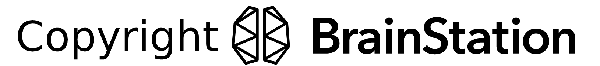
</div>
</div>